In [16]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

In [17]:
r = requests.get("http://213.136.85.153:9000/exp?query=select * from liqui")
rawData = r.text
df = pd.read_csv(io.StringIO(rawData), parse_dates=['timestamp'], index_col='timestamp')

In [18]:
df['USD'] = df.QUANTITY * df.PRICE

In [20]:
df.USD.max()

966770.4655999999

<AxesSubplot:xlabel='timestamp'>

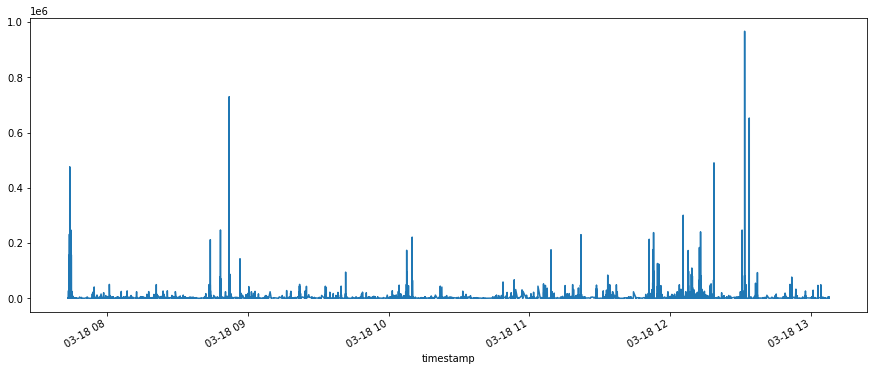

In [19]:
df.USD.plot(figsize=(15,6))